<a href="https://colab.research.google.com/github/PartyForYou/MachineLearningProgramming/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**과제 1.**

타이타닉 데이터 세트를 이용하여
* SGD분류,
* 결정트리,
* 랜덤포래스트,
* 히스토그램기반 그래디언트 부스팅

모델을 만들고 최적화.

---

기본값으로 모델을 생성하고, 최적화를 진행할 것.

* random_state는 자신의 학번으로 설정.

입력 데이터도 적절히 수정할 것.

* NaN(Not A Number) 값을 어떻게 처리했는가?

* 왜 이렇게 훈련 및 테스트 세트를 만들었는가?

수행한 최적화 방법을 단계별로 자세히 설명할 것.

* 왜 이런 파리미터를 수정하는가?

* 왜 이렇게 파라미터 범위를 정했는가?

* 왜 이런 파라미터를 최종적으로 선택했는가?

위에 언급한 것 말고도 다양한 방법을 사용해 볼 것.

모델을 만들고 난 후에도 필요하면 입력 데이터를 수정하여 다시 모델을 만들 수 있음.

* 특성 공학 이용
---

**주의!!!**

다운받은 파일 수정 금지 및 모든 데이터 사용할 것.

그러나 변수로 지정된 데이터는 수정가능.

파일 /content/drive/MyDrive/Colab Notebooks/에 업로드하여 사용할 것.

* 예) titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")

random_state는 자신의 학번으로 설정.

10/15일까지 자신의 GitHub에 업로드할 것.

---

타이타닉 데이터 세트 (이진분류)

https://www.kaggle.com/competitions/titanic/data

과제하기 앞서 train 데이터와 test 데이터를 train데이터에서 나누겠다.

왜냐하면 train데이터에 대한 생존 여부를 모르기 때문에 정확도를 알 수 없기 때문이다.

# 데이터 준비

In [1]:
import pandas as pd
titanic_test = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")
titanic_train = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
titanic_gender_submission = pd.read_csv("/content/drive/MyDrive/titanic/gender_submission.csv")

# 데이터 확인 및 수정

## titanic_test 데이터 확인

In [2]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
# 결측치 개수 확인
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# 요금별 최다 빈수
titanic_test['Fare'].value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

총 418개의 행 중에서 Age는 86개의, Fare는 1개의, Cabin은 327개의 누락 데이터를 확인할 수 있다.

먼저 나이가 누락 데이터인 사람들은 평균 데이터로 대처하는 것이 제일 좋아 보인다.

그다음 Fare는 승객 요금으로 가장 빈도가 높은 7.75로 대처하는 것이 좋아 보인다.

마지막으로 Cabin은 누락 데이터가 너무 많아서 열을 삭제하는 것이 제일 좋아 보인다.

### titanic_test 데이터 수정

In [7]:
# 나이 대체
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean())  # 나이 평균값으로 대체

# 승객 요금 대체
titanic_test['Fare'] = titanic_test['Fare'].fillna(7.75)

# Cabin(객실 번호) 삭제
titanic_test = titanic_test.drop(columns=['Cabin'])

titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


## titanic_train 데이터 확인

In [8]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Age는 위와 같이 평균으로 대체할 것이고

- Cabin은 위와 같이 열을 삭제

- Embarked(기항장 위치)는 최대 빈도수로 채울 것이다.

In [11]:
# 요금별 최다 빈수
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### titanic_train 데이터 수정

In [12]:
# 나이 대체
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].mean())  # 나이 평균값으로 대체

# Embarked 대체
titanic_test['Embarked'] = titanic_test['Embarked'].fillna('S')

# Cabin(객실 번호) 삭제
# titanic_test = titanic_test.drop(columns=['Cabin'])

titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


## titanic_gender_submission 데이터 확인

In [13]:
titanic_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [14]:
titanic_gender_submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [15]:
titanic_gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [16]:
titanic_gender_submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


모든 데이터 값이 not null이기 때문에 굳이 바꾸지 않아도 될 것 같다.

또한 모든 값이 숫자로 나타나있기 때문에 수정을 하지 않아도 될 것 같다.

## 데이터 합치기

코드의 편리함을 위해서 먼저 titanic_gender_submission의 데이터들을 titanic_test로 옮길려고 한다.

PassengerId에 맞는 값으로 옮기게 할 것이다.

In [17]:
# 데이터 합치기
titanic = pd.merge(titanic_test, titanic_gender_submission)
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,0


In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 39.2+ KB


In [19]:
titanic['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [20]:
titanic['Ticket'].value_counts()

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

## object 데이터에 대해서(데이터 전처리)

모델을 학습하기 위해서는 정수데이터로만 가능하기 때문에 데이터 전처리를 하려고 한다.

- Name은 종류수가 너무 많고 모델이 학습하기에는 너무 무관하기 때문에 사용하지 않겠다.
- Sex는 원핫인코딩으로 Female열과 Male열로 만들어서 표현하면 될 것 같다.(중성같은 것은 없다)
- Ticket은 종류수도 너무 많고 Name과 같이 모델이 학습하기에는 무관해 보인다.
- Embarked도 원핫인코딩으로 표현하면 될 것 같다.


In [21]:
# 성별 원핫인코딩하기
sex_train_dummies = pd.get_dummies(titanic["Sex"])
sex_train_dummies.columns = ["Female", "Male"]
titanic.drop("Sex", axis = 1, inplace = True)
titanic = titanic.join(sex_train_dummies)
titanic.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Female,Male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,0,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,1,1,0


In [22]:
# Embarked 원핫인코딩하기
embarked_train_dummies = pd.get_dummies(titanic["Embarked"])
embarked_train_dummies.columns = ["S", "C", "Q"]
titanic.drop("Embarked", axis = 1, inplace = True)
titanic = titanic.join(embarked_train_dummies)
titanic.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Survived,Female,Male,S,C,Q
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,1,0,0,0,1


## Data배열을 Numpy 배열로 바꾸기

모델이 학습할 수 있도록 numpy 배열로 바꿔준다.

승객번호도 학습에 무관하기 때문에 빼준다.

In [23]:
titanic_data = titanic[['Pclass', 'Female', 'Male', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q']].to_numpy()
titanic_target = titanic['Survived'].to_numpy()

## 훈련 세트 테스트 세트 나누기

아래와 같이 훈련 세트와 테스트 세트로 나눈다.

검증 세트는 titanic_train 데이터 세트를 사용 할 것이다.

**왜 이렇게 훈련 및 테스트 세트를 만들었는가?**
1. 훈련 데이터 세트를 나눌 때는 테스트 세트보다 더 많아야 한다.
2. 훈련 데이터 세트를 나누기 전에 양성, 음성 클래스가 훈련세트나 테스트 세트의 어느 한쪽에 몰리지 않도록 골고루 섞어야 한다.(stratify)
3. 데이터가 그리 많지 않기 때문에 8:2 비율이 적절해 보인다.

In [24]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    titanic_data, titanic_target, test_size=0.2, random_state=201935222, stratify = titanic_target)

print(train_input.shape, test_input.shape)

(334, 10) (84, 10)


In [25]:
test_target

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

## 정규화하기

정규화의 목적은 데이터셋의 numerical value 범위의 차이를 왜곡하지 않고 공통 척도로 변경하는 것

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

이제 모델을 만들 모든 준비가 끝났다...

모델을 만들어보자!

# SGD분류


In [27]:
# 기본 default값으로 해보자
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss="log_loss", max_iter = 10, random_state = 201935222)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.coef_, sc.intercept_)

1.0
1.0
[[ -4.29784424  27.67240705 -27.67240705  -3.27316994   4.8217568
   -1.94232055   5.38368314  -4.37128845   1.71710342   2.78575399]] [-15.59674382]


성별에 대해 엄청나게 높은 결정계수가 나왔다.

이에 대해 데이터를 확인해보니 남자면 모두 죽고 여자면 모두 살았다..

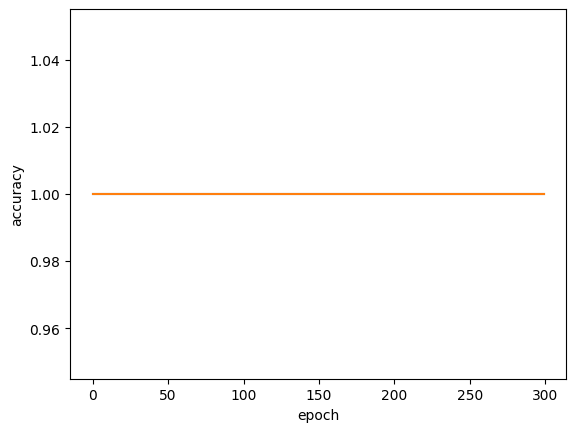

In [28]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=201935222)

train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

그래서 어쩔수 없이 성별 데이터를 사용하지 않고 진행하겠다.

In [29]:
titanic_data = titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q']].to_numpy()
titanic_target = titanic['Survived'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
    titanic_data, titanic_target, test_size=0.2, random_state=201935222, stratify = titanic_target)

print(train_input.shape, test_input.shape)

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

(334, 8) (84, 8)


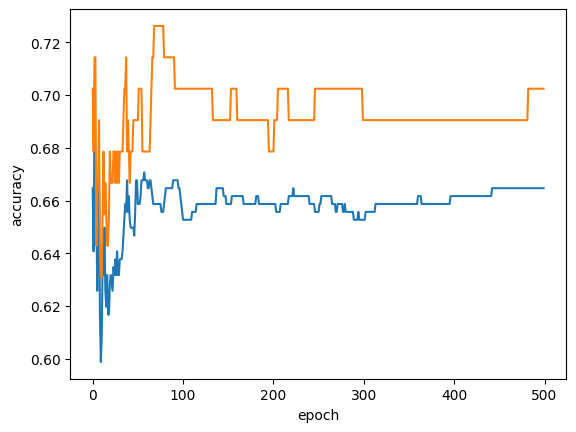

In [30]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=201935222)

train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0, 500):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

성별이 없으니 매우 처참한 학습률을 보인다...

어지럽지만 어쩔수있나.. 에포크 200후반대에서 test_score과 train_score 둘다 높은 값(다른 결과값에 비해서는 좋지만 실은 매우 과소적합인 사실...)을 택하겠다.

In [31]:
sc = SGDClassifier(loss='log_loss', max_iter=290, tol=None, random_state=201935222)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.655688622754491
0.6785714285714286


한 김에 힌지 손실까지 해보겠다.

힌지 손실: SGDClaasifier에서 기본적으로 사용하는 손실함수

서포트 벡터 머신 알고리즘을 위한 손실함수

In [32]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=201935222)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.6646706586826348
0.6309523809523809


솔직히 성별을 넣고 싶다. 성별을 넣으면 학습률이 100퍼인데 우리가 결과를 보는 데에는 매우 안좋지만 실제로 학습률 100퍼센트면 엄청나게 말도안되게 놀라운 수치인 거니까.. 하지만 과제기 때문에 이런 방식을 택하겠다.

# 결정트리

여기도 성별을 넣으면 말도 안되는 학습률을 보이기 때문에 성별을 포함하지 않겠다.

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=201935222)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9670658682634731
0.6309523809523809


엄청난 과대적합이 보인다.

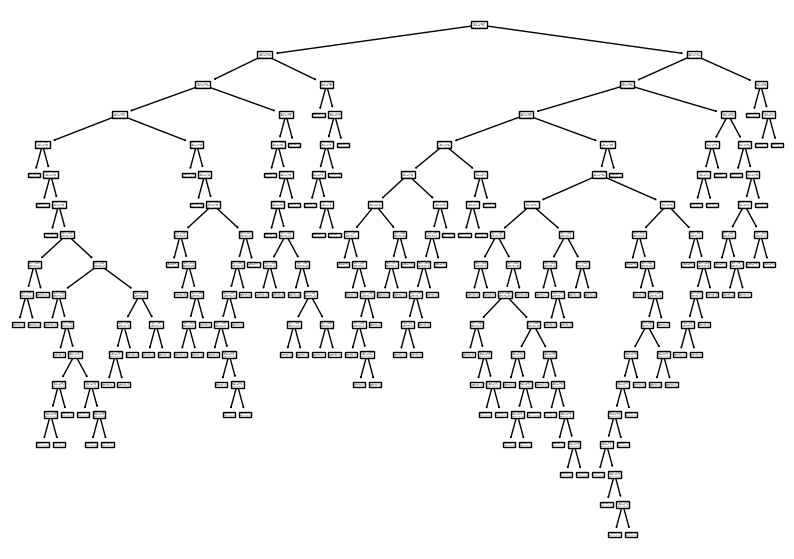

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()


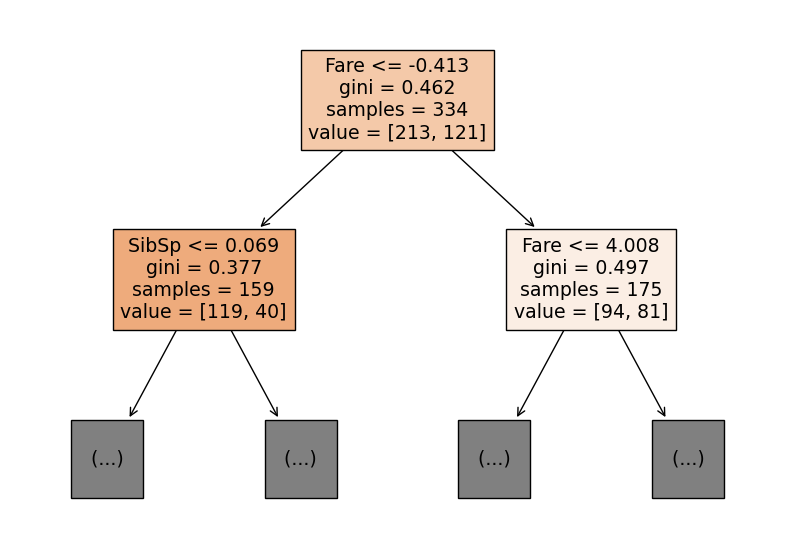

In [35]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q'])
plt.show()

규제를 해서 학습률을 높이겠다.

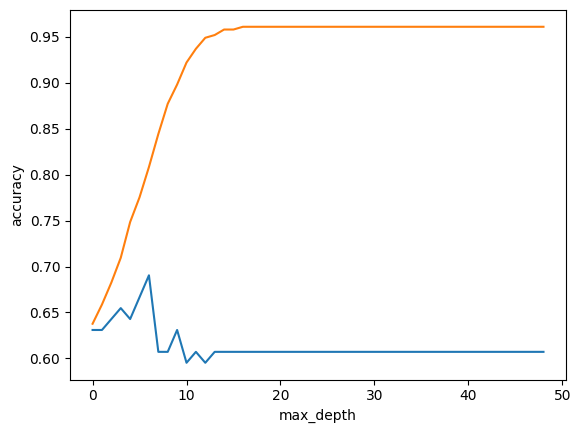

In [36]:
from sklearn.tree import DecisionTreeClassifier

train_score = []
test_score = []
for i in range(1, 50):
  model = DecisionTreeClassifier(max_depth = i, random_state=201935222, min_impurity_decrease=0.0005)
  model.fit(train_input, train_target)
  train_score.append(model.score(train_input, train_target))
  test_score.append(model.score(test_input, test_target))
import matplotlib.pyplot as plt
plt.plot(test_score)
plt.plot(train_score)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

참담하다... 그나마 test_score이 높은 6을 택하면 될 것 같다..

In [37]:
model = DecisionTreeClassifier(max_depth = 6, random_state=201935222, min_impurity_decrease=0.0005)
model.fit(train_input, train_target)

print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

0.7754491017964071
0.6666666666666666


['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q'] 특성중 한번 골라서 써보겠다.

단, 성별은 무조건 100퍼가 나오므로 포함시키지 않겠다.

In [38]:
data_e = titanic[['Age']].to_numpy()
target_e = titanic['Survived'].to_numpy()

from sklearn.model_selection import train_test_split
train_input_e, test_input_e, train_target_e, test_target_e = train_test_split(
    data_e, target_e, test_size=0.2, random_state=201935222, stratify = titanic_target)

dt = DecisionTreeClassifier(max_depth=6, random_state=201935222)
dt.fit(train_input_e, train_target_e)

print(dt.score(train_input_e, train_target_e))
print(dt.score(test_input_e, test_target_e))

0.7155688622754491
0.6071428571428571


In [39]:
data_e = titanic[['Age', 'SibSp', 'S', 'C', 'Q']].to_numpy()
target_e = titanic['Survived'].to_numpy()

from sklearn.model_selection import train_test_split
train_input_e, test_input_e, train_target_e, test_target_e = train_test_split(
    data_e, target_e, test_size=0.2, random_state=201935222, stratify = titanic_target)

dt = DecisionTreeClassifier(max_depth=6, random_state=201935222)
dt.fit(train_input_e, train_target_e)

print(dt.score(train_input_e, train_target_e))
print(dt.score(test_input_e, test_target_e))

0.7395209580838323
0.5952380952380952


In [40]:
data_e = titanic[[ 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q']].to_numpy()
target_e = titanic['Survived'].to_numpy()

from sklearn.model_selection import train_test_split
train_input_e, test_input_e, train_target_e, test_target_e = train_test_split(
    data_e, target_e, test_size=0.2, random_state=201935222, stratify = titanic_target)

dt = DecisionTreeClassifier(max_depth=6, random_state=201935222)
dt.fit(train_input_e, train_target_e)

print(dt.score(train_input_e, train_target_e))
print(dt.score(test_input_e, test_target_e))

0.7754491017964071
0.6666666666666666


PClass는 학습에 영향이 거의 없다는 것을 알 수 있다. 따라서 PClass를 제외한 모델을 만드는게 더 좋아보인다.


# 랜덤 포레스트

앙살블 학습 중 가장 유명하고 안정적인 성능을 제공한다고 한다.

개인적으로 마음에 드는 이유가 시간이 좀 오래 걸려도 param만 잘 입력해주면 그 param값중에서 제일 좋은 값을 알아서 찾아준다고 하니 좋다...

In [41]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import uniform, randint
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }


from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(RandomForestClassifier(random_state=201935222), params,
                        n_iter=100, n_jobs=-1, random_state=201935222)


gs.fit(train_input, train_target)
print(gs.best_params_)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

{'max_depth': 47, 'min_impurity_decrease': 0.0009364737761031596, 'min_samples_leaf': 1, 'min_samples_split': 24}
0.7724550898203593
0.6904761904761905


과연 성별이 여기서도 영향이 클까? 학습률이 100퍼센트가 한번이라도 보이면 ... 모르겠다.. 데이터문제라..

In [42]:
titanic_data = titanic[['Pclass', 'Female', 'Male', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q']].to_numpy()
titanic_target = titanic['Survived'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
    titanic_data, titanic_target, test_size=0.2, random_state=201935222, stratify = titanic_target)

import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import uniform, randint
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }


from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(RandomForestClassifier(random_state=201935222), params,
                        n_iter=100, n_jobs=-1, random_state=201935222)


gs.fit(train_input, train_target)
print(gs.best_params_)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

{'max_depth': 42, 'min_impurity_decrease': 0.00020179714604184, 'min_samples_leaf': 10, 'min_samples_split': 21}
1.0
1.0


.... 학습률 100퍼 달성했다..

# 히스토그램기반 그래디언트 부스팅

여기서는 성별에 대해 많이 데었기 때문에 성별을 사용하지 않겠다.

In [43]:
titanic_data = titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q']].to_numpy()
titanic_target = titanic['Survived'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
    titanic_data, titanic_target, test_size=0.2, random_state=201935222, stratify = titanic_target)

In [44]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance

params = {'learning_rate': uniform(0.0001, 0.001),
          'max_depth': randint(20, 30)
          }


hgb = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=201935222), params,
                        n_iter=100, n_jobs=-1, random_state=42)
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=201935222, n_jobs=-1)
print(hgb.score(test_input, test_target))
print(hgb.score(test_input, test_target))

print(hgb.best_params_)

0.6309523809523809
0.6309523809523809
{'learning_rate': 0.0004745401188473625, 'max_depth': 27}


좋지 않은 학습률들을 보이지만 별수있나.. 성별이 아무래도 큰 영향을 끼치는 것 같다.

추후에 알게 된 사실인데 train데이터에도 survived가 나와있어 한번 survived로도 간략하게 작성해보겠다.

In [45]:
# 성별 원핫인코딩하기
sex_train_dummies = pd.get_dummies(titanic_train["Sex"])
sex_train_dummies.columns = ["Female", "Male"]
titanic_train.drop("Sex", axis = 1, inplace = True)
titanic_train = titanic_train.join(sex_train_dummies)
titanic_train.head()

# Embarked 원핫인코딩하기
embarked_train_dummies = pd.get_dummies(titanic_train["Embarked"])
embarked_train_dummies.columns = ["S", "C", "Q"]
titanic_train.drop("Embarked", axis = 1, inplace = True)
titanic_train = titanic_train.join(embarked_train_dummies)
titanic_train.head()

# numpy로 바꾸기
titanic_data = titanic_train[['Pclass', 'Female', 'Male', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q']].to_numpy()
titanic_target = titanic_train['Survived'].to_numpy()

# 테스트세트 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    titanic_data, titanic_target, test_size=0.2, random_state=201935222, stratify = titanic_target)

print(train_input.shape, test_input.shape)

# 정규화하기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

(712, 10) (179, 10)


## SGD분류

SGD분류부터 해보겠다.

In [46]:
# 기본 default값으로 해보자
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss="log_loss", max_iter = 10, random_state = 201935222)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.coef_, sc.intercept_)

0.6966292134831461
0.7206703910614525
[[-0.68077325  3.95111912 -3.95111912 -2.9850899  -2.23269311 -1.10792843
  -4.80138041  0.95269057  1.04911261 -4.2586732 ]] [2.18906759]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


아까 기이한 계수들보단 좀 정상적인 계수들로 이루어져있다.

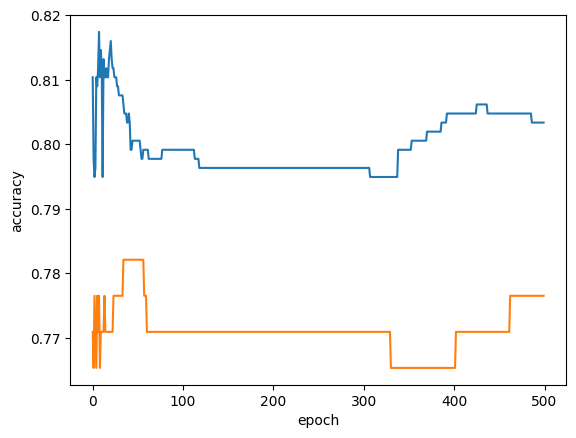

In [47]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=201935222)

train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0, 500):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

80정도에서 적당학 학습률을 보인다.

과소적합이지만 일단 80으로 학습해보겠다.

In [48]:
sc = SGDClassifier(loss='log_loss', max_iter=80, tol=None, random_state=201935222)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8061797752808989
0.7877094972067039


힌지 손실

In [49]:
sc = SGDClassifier(loss='hinge', max_iter=80, tol=None, random_state=201935222)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8047752808988764
0.776536312849162


## 결정트리

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=201935222)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9831460674157303
0.8044692737430168


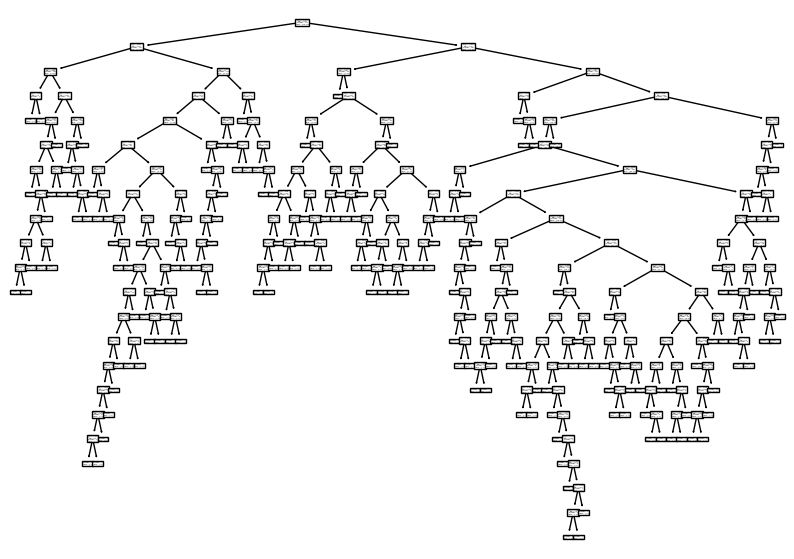

In [51]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()


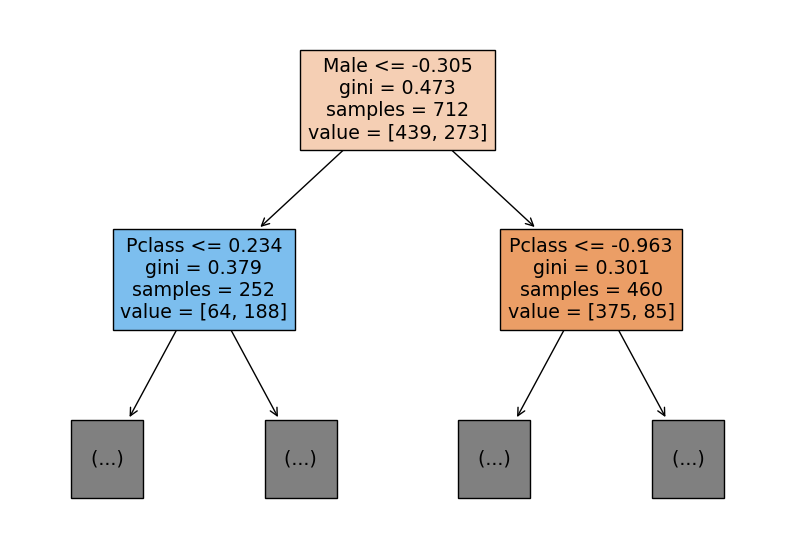

In [52]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['Pclass', 'Female', 'Male', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q'])
plt.show()

마찬가지로 규제를 해서 학습률을 조금 높이겠다.

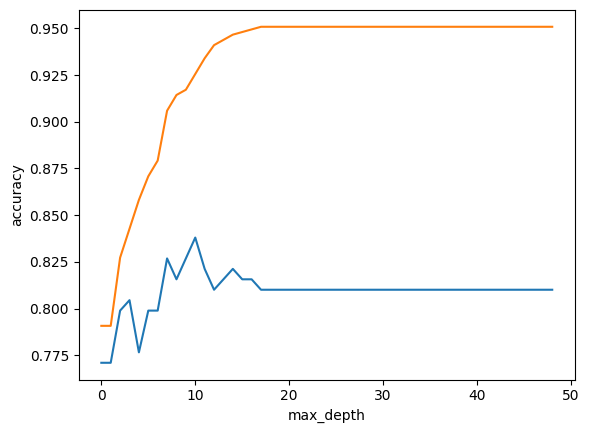

In [53]:
from sklearn.tree import DecisionTreeClassifier

train_score = []
test_score = []
for i in range(1, 50):
  model = DecisionTreeClassifier(max_depth = i, random_state=201935222, min_impurity_decrease=0.0005)
  model.fit(train_input, train_target)
  train_score.append(model.score(train_input, train_target))
  test_score.append(model.score(test_input, test_target))
import matplotlib.pyplot as plt
plt.plot(test_score)
plt.plot(train_score)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

저딴 쓰레기 test데이터들보다 훨씬 좋은 결과가 나온다. 사실 과소적합이긴 하지만 그나마 좋은 3~4를 택하고 학습하겠다.

In [55]:
model = DecisionTreeClassifier(max_depth = 4, random_state=201935222, min_impurity_decrease=0.0005)
model.fit(train_input, train_target)

print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

0.8426966292134831
0.8044692737430168


한번 변수들을 택해서 좋은 결과를 내보도록 하겠다.

In [71]:
data_e = titanic_train[[ 'Female', 'Male', 'Age', 'SibSp', 'Fare', 'S', 'C', 'Q']].to_numpy()
target_e = titanic_train['Survived'].to_numpy()

from sklearn.model_selection import train_test_split
train_input_e, test_input_e, train_target_e, test_target_e = train_test_split(
    data_e, target_e, test_size=0.2, random_state=201935222, stratify = titanic_target)

dt = DecisionTreeClassifier(max_depth=4, random_state=201935222)
dt.fit(train_input_e, train_target_e)

print(dt.score(train_input_e, train_target_e))
print(dt.score(test_input_e, test_target_e))

0.8286516853932584
0.8100558659217877


['Pclass', 'Female', 'Male', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q'] 중 Pclass와 Parch를 빼는 것이 결과가 좋게 나온다.

## 랜덤포레스트

In [73]:
titanic_data = titanic_train[[ 'Female', 'Male', 'Age', 'SibSp', 'Fare', 'S', 'C', 'Q']].to_numpy()
titanic_target = titanic_train['Survived'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
    titanic_data, titanic_target, test_size=0.2, random_state=201935222, stratify = titanic_target)

import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import uniform, randint
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }


from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(RandomForestClassifier(random_state=201935222), params,
                        n_iter=100, n_jobs=-1, random_state=201935222)


gs.fit(train_input, train_target)
print(gs.best_params_)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

{'max_depth': 45, 'min_impurity_decrease': 0.000845178157776995, 'min_samples_leaf': 3, 'min_samples_split': 16}
0.8216292134831461
0.7821229050279329


## 히스토그램기반 그래디언트 부스팅

In [74]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance

params = {'learning_rate': uniform(0.0001, 0.001),
          'max_depth': randint(20, 30)
          }


hgb = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=201935222), params,
                        n_iter=100, n_jobs=-1, random_state=42)
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=201935222, n_jobs=-1)
print(hgb.score(test_input, test_target))
print(hgb.score(test_input, test_target))

print(hgb.best_params_)

0.6145251396648045
0.6145251396648045
{'learning_rate': 0.0004745401188473625, 'max_depth': 27}


위에서 설명은 했으니 반복해서 쓰진 않겠습니다..